# S4

### S4, 0138-BLUE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

db1_1 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040001_230911-15/230915/S4/4-1/21호0138-파란색 차량/Rx_OBU_CKCOX23040001_20230915-11-54-22_20230915-12-05-06_644secs.csv")
db1_2 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040001_230911-15/230915/S4/4-2/21호0138-파란색 차량/Rx_OBU_CKCOX23040001_20230915-12-31-29_20230915-12-46-08_879secs.csv")

db2_1 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040002_230911-15/230915/S4-1/21호0138-파란색차량/Rx_OBU_CKCOX23040002_20230915-11-54-23_20230915-12-05-06_643secs.csv")
db2_2 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040002_230911-15/230915/S4-2/21호0138-파란색차량/Rx_OBU_CKCOX23040002_20230915-12-31-28_20230915-12-46-09_881secs.csv")

db1 = pd.concat([db1_1, db1_2])
db2 = pd.concat([db2_1, db2_2])

# 필요한 열 추출
db1 = db1[['usCommDistance', 'unPdr(percent)']]
db2 = db2[['usCommDistance', 'unPdr(percent)']]

In [2]:
#숫자로 변경
db1['unPdr(percent)'] = pd.to_numeric(db1['unPdr(percent)'], errors='coerce')
db1['usCommDistance'] = pd.to_numeric(db1['usCommDistance'], errors='coerce')
db2['unPdr(percent)'] = pd.to_numeric(db2['unPdr(percent)'], errors='coerce')
db2['usCommDistance'] = pd.to_numeric(db2['usCommDistance'], errors='coerce')

# 삭제하기 전 데이터 개수 출력
original_db1_count = len(db1)
original_db2_count = len(db2)

# 누락된 행 삭제
db1 = db1.dropna(subset=['unPdr(percent)'])
db1 = db1.dropna(subset=['usCommDistance'])
db2 = db2.dropna(subset=['unPdr(percent)'])
db2 = db2.dropna(subset=['usCommDistance'])

# 삭제한 행의 수 계산
delete_db1_count = original_db1_count - len(db1)
delete_db2_count = original_db2_count - len(db2)

# 삭제한 행의 수 출력
print(f"CKCOX32040001파일에서 삭제한 행의 수: {delete_db1_count}")
print(f"CKCOX32040002파일에서 삭제한 행의 수: {delete_db2_count}")

CKCOX32040001파일에서 삭제한 행의 수: 0
CKCOX32040002파일에서 삭제한 행의 수: 0


In [3]:
# usCommDistance 오름차순으로 출력
db1.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3295,4.133302,76.91
3294,4.245195,76.91
6446,4.464483,73.44
6441,4.464483,73.42
6445,4.464483,73.44
...,...,...
1450,588.014281,98.10
1456,588.221365,98.11
1452,588.277311,98.10
1454,588.804021,98.11


In [4]:
db2.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
2966,3.542078,69.33
2967,4.182269,69.34
5298,4.446974,64.19
5297,4.446974,64.19
5299,4.565787,64.20
...,...,...
1430,588.406657,96.75
1426,588.566183,96.74
1427,588.817128,96.74
1429,589.068271,96.75


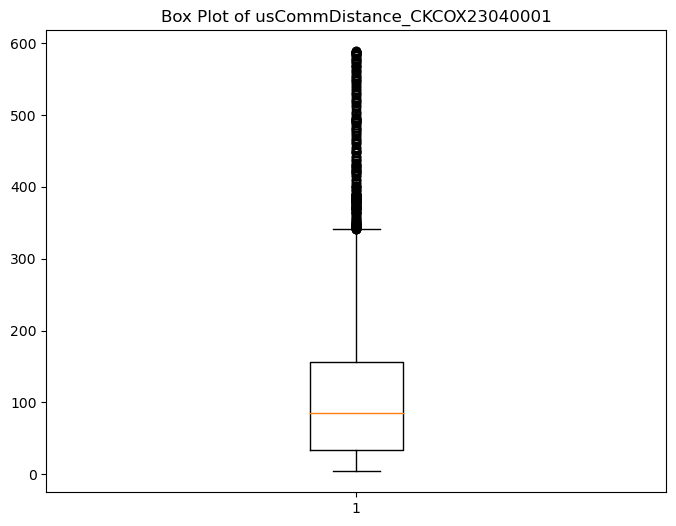

In [5]:
# 박스플롯 생성 (이상치 확인)
plt.figure(figsize=(8, 6))
plt.boxplot(db1['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040001')
plt.show()

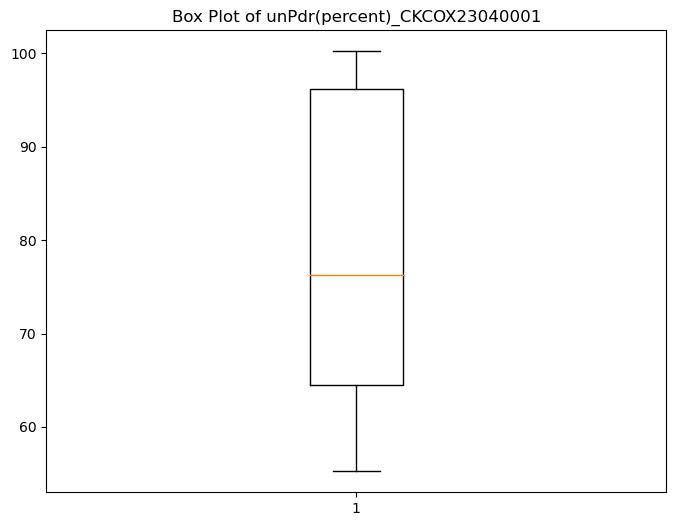

In [6]:
plt.figure(figsize=(8, 6))
plt.boxplot(db1['unPdr(percent)'])
plt.title('Box Plot of unPdr(percent)_CKCOX23040001')
plt.show()

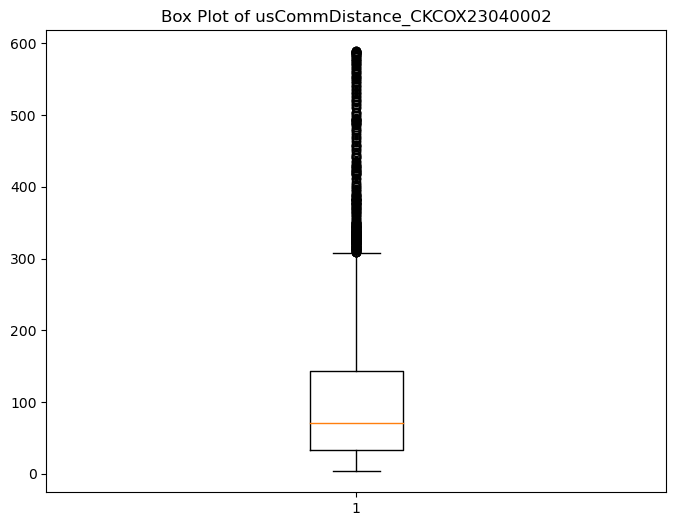

In [7]:
plt.figure(figsize=(8, 6))
plt.boxplot(db2['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040002')
plt.show()

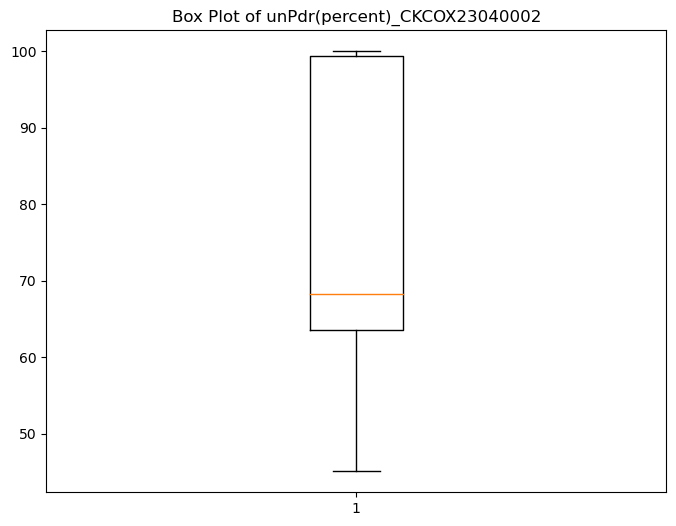

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(db2['unPdr(percent)'])
plt.title('Box Plot of unPdr(percent)_CKCOX23040002')
plt.show()

대체한 이상치의 수: 136
대체한 이상치의 수: 130


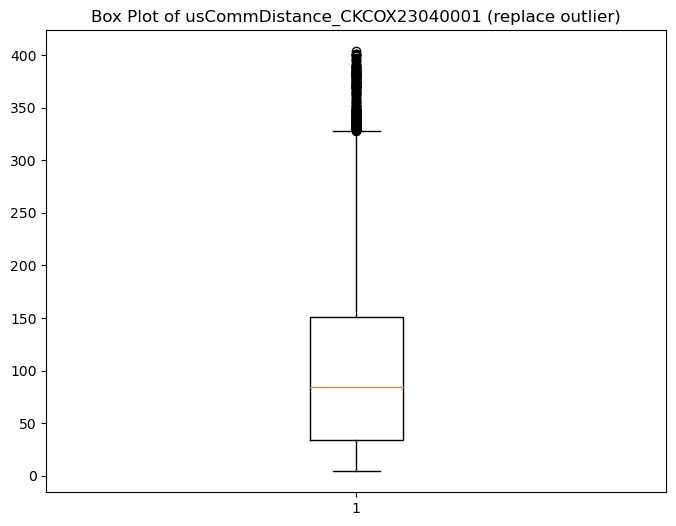

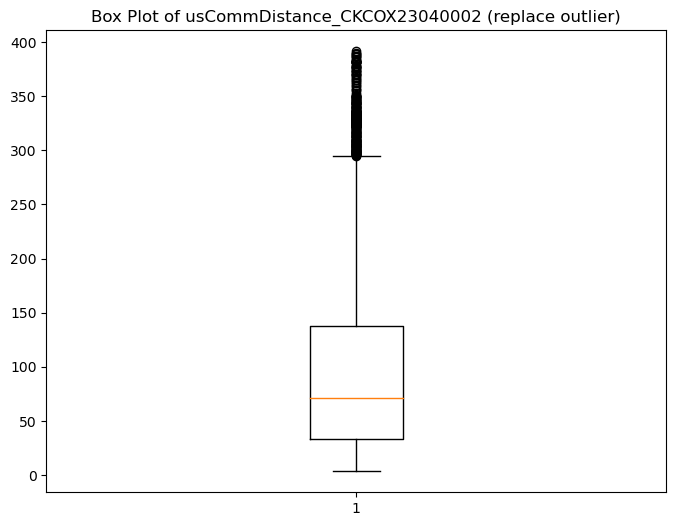

In [9]:
# 이상치 대체 (3표준편차 : 약 99.7%정도)
mean_db1_value = db1['usCommDistance'].mean()
std_db1_dev = db1['usCommDistance'].std()
dev3_db1 = 3 * std_db1_dev
mean_db2_value = db2['usCommDistance'].mean()
std_db2_dev = db2['usCommDistance'].std()
dev3_db2 = 3 * std_db2_dev

# 이상치를 평균값으로 대체하고 대체한 이상치의 수를 계산
outlier_db1_count = sum(abs(db1['usCommDistance'] - mean_db1_value) > dev3_db1)
db1['usCommDistance'] = db1['usCommDistance'].where(abs(db1['usCommDistance'] - mean_db1_value) <= dev3_db1, mean_db1_value)
outlier_db2_count = sum(abs(db2['usCommDistance'] - mean_db2_value) > dev3_db2)
db2['usCommDistance'] = db2['usCommDistance'].where(abs(db2['usCommDistance'] - mean_db2_value) <= dev3_db2, mean_db2_value)

# 대체한 이상치 횟수 출력
print(f"대체한 이상치의 수: {outlier_db1_count}")
print(f"대체한 이상치의 수: {outlier_db2_count}")

# 박스 플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(db1['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040001 (replace outlier)')
plt.show()
plt.figure(figsize=(8, 6))
plt.boxplot(db2['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040002 (replace outlier)')
plt.show()

In [10]:
# usCommDistance 오름차순으로 출력
db1.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3295,4.133302,76.91
3294,4.245195,76.91
6446,4.464483,73.44
6441,4.464483,73.42
6445,4.464483,73.44
...,...,...
498,399.882799,100.00
499,399.883645,100.00
500,401.283347,100.00
1353,401.595231,98.11


In [11]:
db2.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
2966,3.542078,69.33
2967,4.182269,69.34
5298,4.446974,64.19
5297,4.446974,64.19
5299,4.565787,64.20
...,...,...
493,387.145920,100.00
494,388.541622,100.00
3115,388.914541,50.84
495,389.988910,100.00


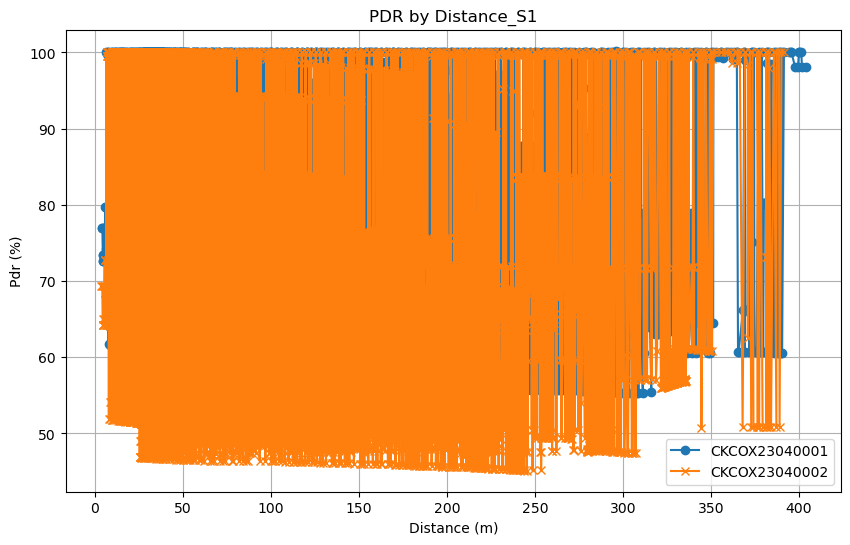

In [12]:
# 데이터 그룹화 및 평균 계산
db1_group = db1.groupby('usCommDistance')['unPdr(percent)'].mean().reset_index()
db2_group = db2.groupby('usCommDistance')['unPdr(percent)'].mean().reset_index()

# 그래프 그리기 (거리별 PDR)
plt.figure(figsize=(10, 6))
plt.plot(db1_group['usCommDistance'], db1_group['unPdr(percent)'], label='CKCOX23040001', marker='o')
plt.plot(db2_group['usCommDistance'], db2_group['unPdr(percent)'], label='CKCOX23040002', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Pdr (%)')
plt.title('PDR by Distance_S1')
plt.legend()
plt.grid(True)
plt.show()

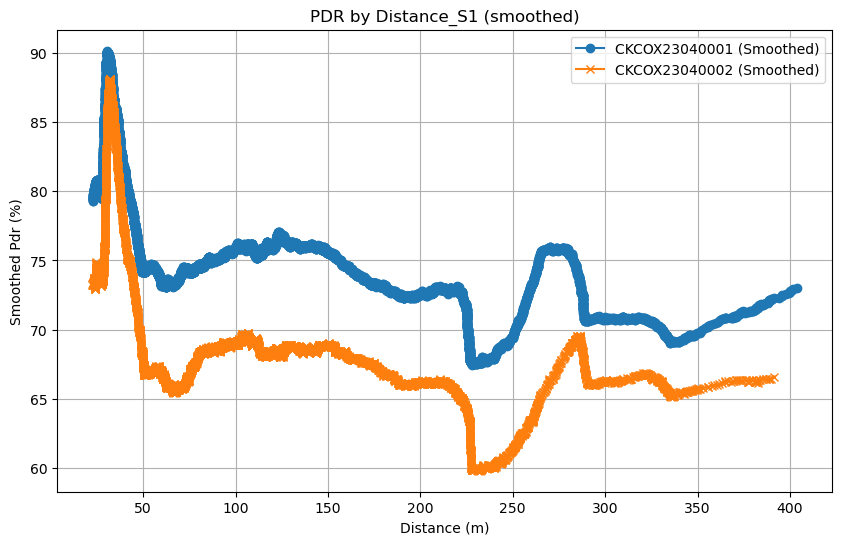

In [13]:
# 이동 평균 계산
window_size = 500
db1_group['unPdr_M'] = db1_group['unPdr(percent)'].rolling(window=window_size).mean()
db2_group['unPdr_M'] = db2_group['unPdr(percent)'].rolling(window=window_size).mean()

# 그래프 그리기 (거리별 PDR)
plt.figure(figsize=(10, 6))
plt.plot(db1_group['usCommDistance'], db1_group['unPdr_M'], label='CKCOX23040001 (Smoothed)', marker='o')
plt.plot(db2_group['usCommDistance'], db2_group['unPdr_M'], label='CKCOX23040002 (Smoothed)', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Smoothed Pdr (%)')
plt.title('PDR by Distance_S1 (smoothed)')
plt.legend()
plt.grid(True)
plt.show()

### S4, 0139-BLUE

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

db1_1 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040001_230911-15/230915/S4/4-1/21호0138-파란색 차량/Rx_OBU_CKCOX23040001_20230915-11-54-22_20230915-12-05-06_644secs.csv")
db1_2 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040001_230911-15/230915/S4/4-2/21호0138-파란색 차량/Rx_OBU_CKCOX23040001_20230915-12-31-29_20230915-12-46-08_879secs.csv")

db2_1 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040002_230911-15/230915/S4-1/21호0138-파란색차량/Rx_OBU_CKCOX23040002_20230915-11-54-23_20230915-12-05-06_643secs.csv")
db2_2 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040002_230911-15/230915/S4-2/21호0138-파란색차량/Rx_OBU_CKCOX23040002_20230915-12-31-28_20230915-12-46-09_881secs.csv")

db1 = pd.concat([db1_1, db1_2])
db2 = pd.concat([db2_1, db2_2])

# 필요한 열 추출
db1 = db1[['usCommDistance', 'unPdr(percent)']]
db2 = db2[['usCommDistance', 'unPdr(percent)']]

In [15]:
#숫자로 변경
db1['unPdr(percent)'] = pd.to_numeric(db1['unPdr(percent)'], errors='coerce')
db1['usCommDistance'] = pd.to_numeric(db1['usCommDistance'], errors='coerce')
db2['unPdr(percent)'] = pd.to_numeric(db2['unPdr(percent)'], errors='coerce')
db2['usCommDistance'] = pd.to_numeric(db2['usCommDistance'], errors='coerce')

# 삭제하기 전 데이터 개수 출력
original_db1_count = len(db1)
original_db2_count = len(db2)

# 누락된 행 삭제
db1 = db1.dropna(subset=['unPdr(percent)'])
db1 = db1.dropna(subset=['usCommDistance'])
db2 = db2.dropna(subset=['unPdr(percent)'])
db2 = db2.dropna(subset=['usCommDistance'])

# 삭제한 행의 수 계산
delete_db1_count = original_db1_count - len(db1)
delete_db2_count = original_db2_count - len(db2)

# 삭제한 행의 수 출력
print(f"CKCOX32040001파일에서 삭제한 행의 수: {delete_db1_count}")
print(f"CKCOX32040002파일에서 삭제한 행의 수: {delete_db2_count}")

CKCOX32040001파일에서 삭제한 행의 수: 0
CKCOX32040002파일에서 삭제한 행의 수: 0


In [16]:
# usCommDistance 오름차순으로 출력
db1.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3295,4.133302,76.91
3294,4.245195,76.91
6446,4.464483,73.44
6441,4.464483,73.42
6445,4.464483,73.44
...,...,...
1450,588.014281,98.10
1456,588.221365,98.11
1452,588.277311,98.10
1454,588.804021,98.11


In [17]:
db2.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
2966,3.542078,69.33
2967,4.182269,69.34
5298,4.446974,64.19
5297,4.446974,64.19
5299,4.565787,64.20
...,...,...
1430,588.406657,96.75
1426,588.566183,96.74
1427,588.817128,96.74
1429,589.068271,96.75


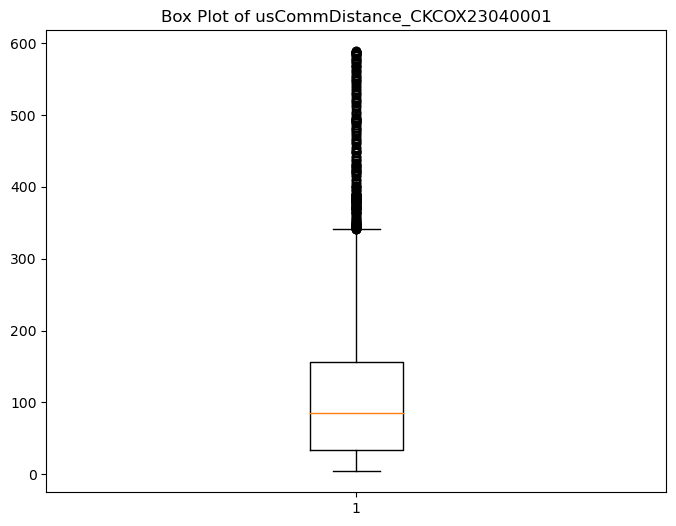

In [18]:
# 박스플롯 생성 (이상치 확인)
plt.figure(figsize=(8, 6))
plt.boxplot(db1['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040001')
plt.show()

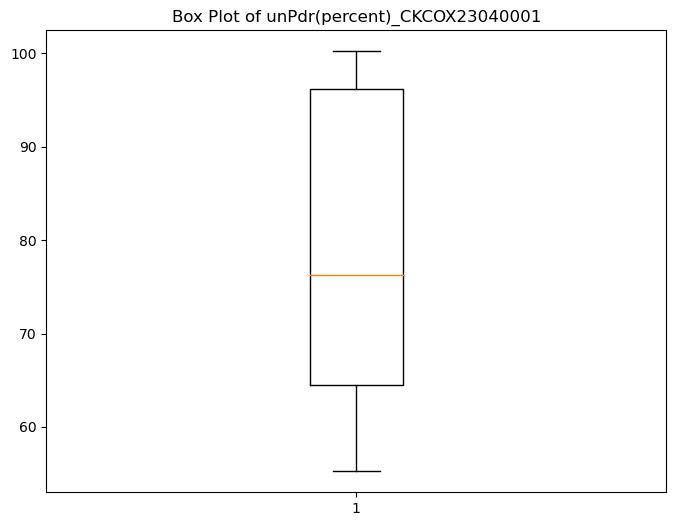

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot(db1['unPdr(percent)'])
plt.title('Box Plot of unPdr(percent)_CKCOX23040001')
plt.show()

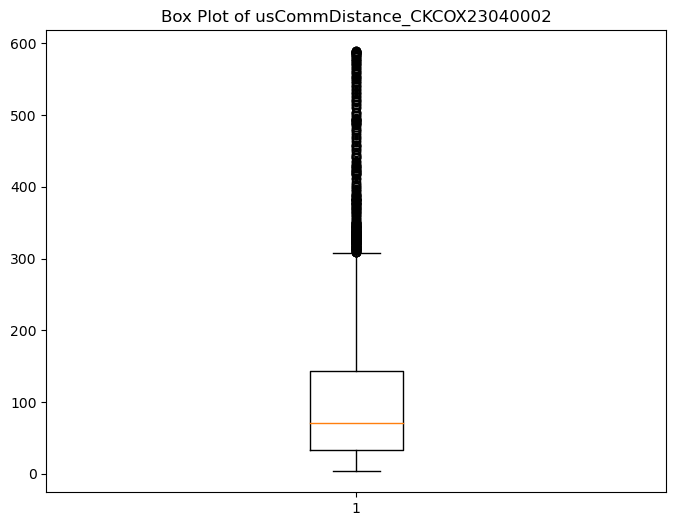

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(db2['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040002')
plt.show()

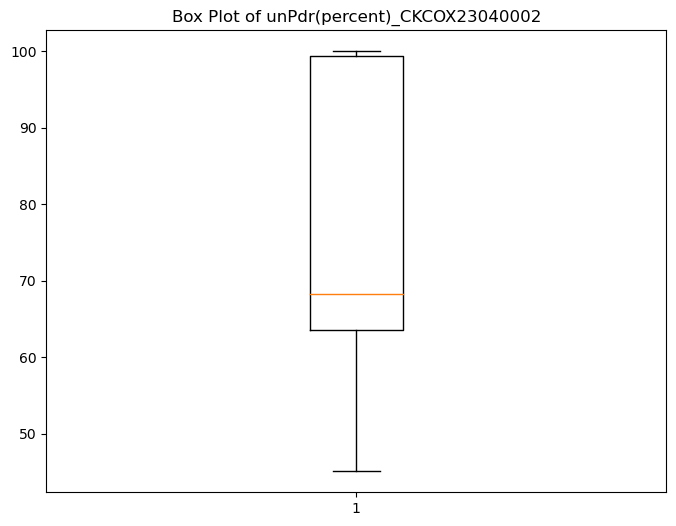

In [21]:
plt.figure(figsize=(8, 6))
plt.boxplot(db2['unPdr(percent)'])
plt.title('Box Plot of unPdr(percent)_CKCOX23040002')
plt.show()

대체한 이상치의 수: 136
대체한 이상치의 수: 130


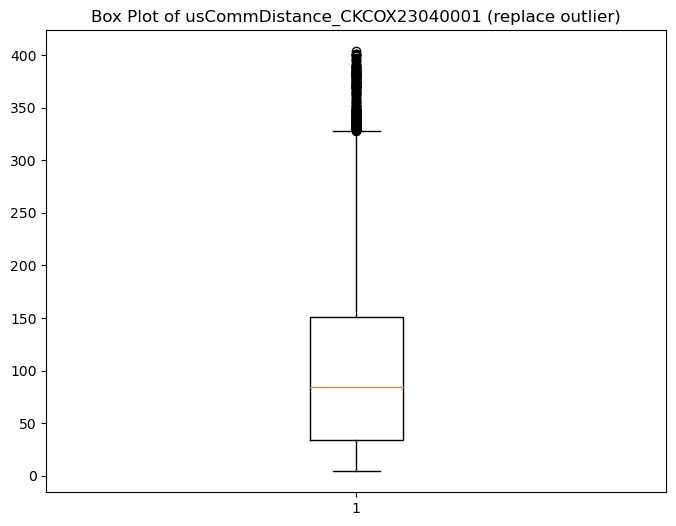

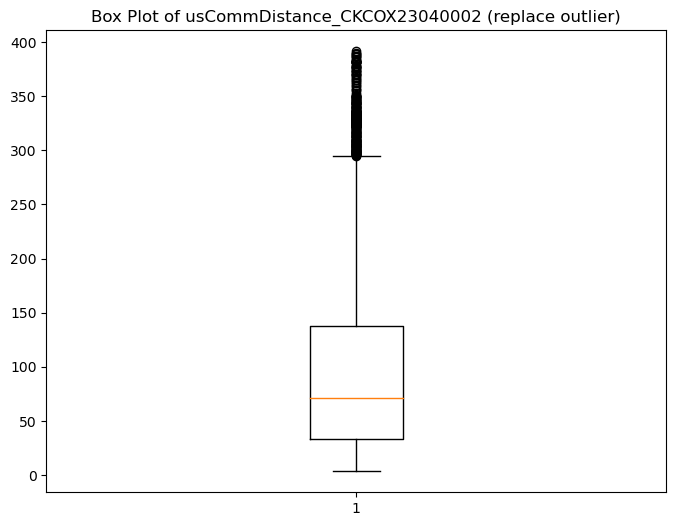

In [22]:
# 이상치 대체 (3표준편차 : 약 99.7%정도)
mean_db1_value = db1['usCommDistance'].mean()
std_db1_dev = db1['usCommDistance'].std()
dev3_db1 = 3 * std_db1_dev
mean_db2_value = db2['usCommDistance'].mean()
std_db2_dev = db2['usCommDistance'].std()
dev3_db2 = 3 * std_db2_dev

# 이상치를 평균값으로 대체하고 대체한 이상치의 수를 계산
outlier_db1_count = sum(abs(db1['usCommDistance'] - mean_db1_value) > dev3_db1)
db1['usCommDistance'] = db1['usCommDistance'].where(abs(db1['usCommDistance'] - mean_db1_value) <= dev3_db1, mean_db1_value)
outlier_db2_count = sum(abs(db2['usCommDistance'] - mean_db2_value) > dev3_db2)
db2['usCommDistance'] = db2['usCommDistance'].where(abs(db2['usCommDistance'] - mean_db2_value) <= dev3_db2, mean_db2_value)

# 대체한 이상치 횟수 출력
print(f"대체한 이상치의 수: {outlier_db1_count}")
print(f"대체한 이상치의 수: {outlier_db2_count}")

# 박스 플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(db1['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040001 (replace outlier)')
plt.show()
plt.figure(figsize=(8, 6))
plt.boxplot(db2['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040002 (replace outlier)')
plt.show()

In [23]:
# usCommDistance 오름차순으로 출력
db1.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3295,4.133302,76.91
3294,4.245195,76.91
6446,4.464483,73.44
6441,4.464483,73.42
6445,4.464483,73.44
...,...,...
498,399.882799,100.00
499,399.883645,100.00
500,401.283347,100.00
1353,401.595231,98.11


In [24]:
db2.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
2966,3.542078,69.33
2967,4.182269,69.34
5298,4.446974,64.19
5297,4.446974,64.19
5299,4.565787,64.20
...,...,...
493,387.145920,100.00
494,388.541622,100.00
3115,388.914541,50.84
495,389.988910,100.00


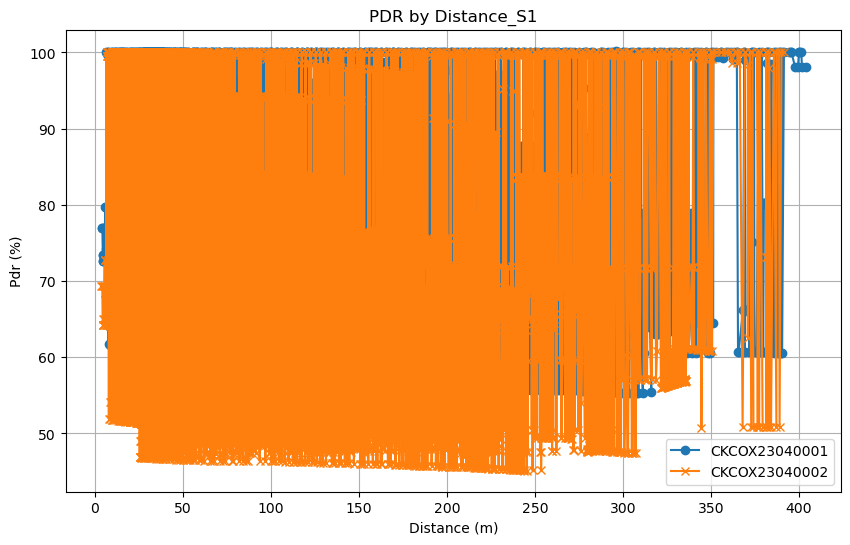

In [25]:
# 데이터 그룹화 및 평균 계산
db1_group = db1.groupby('usCommDistance')['unPdr(percent)'].mean().reset_index()
db2_group = db2.groupby('usCommDistance')['unPdr(percent)'].mean().reset_index()

# 그래프 그리기 (거리별 PDR)
plt.figure(figsize=(10, 6))
plt.plot(db1_group['usCommDistance'], db1_group['unPdr(percent)'], label='CKCOX23040001', marker='o')
plt.plot(db2_group['usCommDistance'], db2_group['unPdr(percent)'], label='CKCOX23040002', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Pdr (%)')
plt.title('PDR by Distance_S1')
plt.legend()
plt.grid(True)
plt.show()

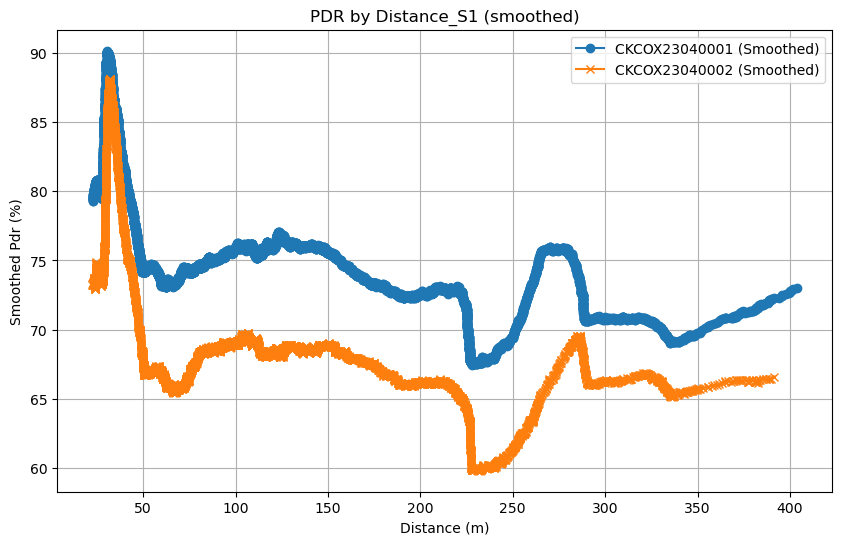

In [26]:
# 이동 평균 계산
window_size = 500
db1_group['unPdr_M'] = db1_group['unPdr(percent)'].rolling(window=window_size).mean()
db2_group['unPdr_M'] = db2_group['unPdr(percent)'].rolling(window=window_size).mean()

# 그래프 그리기 (거리별 PDR)
plt.figure(figsize=(10, 6))
plt.plot(db1_group['usCommDistance'], db1_group['unPdr_M'], label='CKCOX23040001 (Smoothed)', marker='o')
plt.plot(db2_group['usCommDistance'], db2_group['unPdr_M'], label='CKCOX23040002 (Smoothed)', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Smoothed Pdr (%)')
plt.title('PDR by Distance_S1 (smoothed)')
plt.legend()
plt.grid(True)
plt.show()